## ノック11: データ読み込みと不要データを除外

In [1]:
# 注文データを読み込み
import pandas as pd
order_data = pd.read_csv('./order_data.csv')
print(len(order_data))
order_data.head()

703880


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払済
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済


In [2]:
# 分析に必要ないデータを除外1
order_data = order_data.loc[(order_data['status']==1)|(order_data['status']==2)] #statusが1か2の項目のみ抽出する
print(len(order_data))
order_data.columns

574436


Index(['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
       'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount',
       'status', 'store_name', 'area_cd', 'wide_area', 'narrow_area',
       'takeout_name', 'status_name'],
      dtype='object')

In [3]:
# 分析に必要ないデータを除外2 (列名で指定)
analyze_data = order_data[['store_id', 'customer_id', 'coupon_cd',
       'order_accept_date', 'delivered_date', 'total_amount',
       'store_name', 'wide_area', 'narrow_area',
       'takeout_name', 'status_name']]
print(analyze_data.shape)
analyze_data.head()

(574436, 11)


,store_id,customer_id,coupon_cd,order_accept_date,delivered_date,total_amount,store_name,wide_area,narrow_area,takeout_name,status_name
0,49,C26387220,50,2020-04-01 11:00:00,2020-04-01 11:18:00,4144,浅草店,東京,東京,お持ち帰り,お支払済
1,85,C48773811,26,2020-04-01 11:00:00,2020-04-01 11:22:00,2877,目黒店,東京,東京,デリバリー,お渡し済
2,76,C66287421,36,2020-04-01 11:00:00,2020-04-01 11:15:00,2603,本郷店,東京,東京,デリバリー,お渡し済
3,190,C41156423,19,2020-04-01 11:00:00,2020-04-01 11:16:00,2732,栃木店,北関東,栃木,デリバリー,お渡し済
4,191,C54568117,71,2020-04-01 11:00:00,2020-04-01 11:53:00,2987,伊勢崎店,北関東,群馬,デリバリー,お渡し済


## ノック12: データの全体像を把握

In [4]:
analyze_data.describe()

,store_id,coupon_cd,total_amount
count,574436.000000,574436.000000,574436.000000
mean,99.113844,49.478758,2960.087555
std,55.913615,28.888993,954.282731
min,1.000000,0.000000,698.000000
25%,51.000000,24.000000,2308.000000
50%,99.000000,49.000000,2808.000000
75%,147.000000,75.000000,3617.000000
max,196.000000,99.000000,5100.000000


In [5]:
# データ型の確認
analyze_data.dtypes

store_id              int64
customer_id          object
coupon_cd             int64
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [6]:
# データ型を文字列に変更
analyze_data[['store_id', 'coupon_cd']] = analyze_data[['store_id', 'coupon_cd']].astype(str)
analyze_data.dtypes

C:\Users\nao23\AppData\Local\Temp\ipykernel_17392\3348044165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyze_data[['store_id', 'coupon_cd']] = analyze_data[['store_id', 'coupon_cd']].astype(str)


store_id             object
customer_id          object
coupon_cd            object
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [7]:
# 警告を出さないようにする
import warnings
warnings.filterwarnings('ignore')

In [8]:
analyze_data.describe()

,total_amount
count,574436.000000
mean,2960.087555
std,954.282731
min,698.000000
25%,2308.000000
50%,2808.000000
75%,3617.000000
max,5100.000000


## ノック13: 月別売上を集計

In [9]:
# 注文受付日時の編集
analyze_data['order_accept_date'] = pd.to_datetime(analyze_data['order_accept_date'])  # 日時データに変換
analyze_data['order_accept_month'] = analyze_data['order_accept_date'].dt.strftime('%Y%m')  # 月別表示を追加
analyze_data[['order_accept_date', 'order_accept_month']].head()

,order_accept_date,order_accept_month
0,2020-04-01 11:00:00,202004
1,2020-04-01 11:00:00,202004
2,2020-04-01 11:00:00,202004
3,2020-04-01 11:00:00,202004
4,2020-04-01 11:00:00,202004


In [10]:
# 配達日時の編集
analyze_data['delivered_date'] = pd.to_datetime(analyze_data['delivered_date'])  # 日時データに変換
analyze_data['delivered_month'] = analyze_data['delivered_date'].dt.strftime('%Y%m')  # 月別表示を追加
analyze_data[['delivered_date', 'delivered_month']].head()

,delivered_date,delivered_month
0,2020-04-01 11:18:00,202004
1,2020-04-01 11:22:00,202004
2,2020-04-01 11:15:00,202004
3,2020-04-01 11:16:00,202004
4,2020-04-01 11:53:00,202004


In [11]:
analyze_data.dtypes

store_id                      object
customer_id                   object
coupon_cd                     object
order_accept_date     datetime64[ns]
delivered_date        datetime64[ns]
total_amount                   int64
store_name                    object
wide_area                     object
narrow_area                   object
takeout_name                  object
status_name                   object
order_accept_month            object
delivered_month               object
dtype: object

In [12]:
analyze_data[["order_accept_date", "delivered_date"]] = analyze_data[["order_accept_date", "delivered_date"]].astype('int64').astype(int)

In [13]:
# 月別の統計データを作成
month_data = analyze_data.groupby('order_accept_month')
month_data.describe()

order_accept_date                              \
                               count          mean           std   
order_accept_month                                                 
202004                      189414.0 -4.139360e+06  1.241865e+09   
202005                      195684.0 -2.946123e+06  1.243143e+09   
202006                      189338.0  1.053864e+06  1.240179e+09   

                                                                         \
                             min           25%        50%           75%   
order_accept_month                                                        
202004             -2.146702e+09 -1.082155e+09 -2444800.0  1.068558e+09   
202005             -2.146809e+09 -1.082593e+09 -1236480.0  1.075570e+09   
202006             -2.147022e+09 -1.072513e+09  1393152.0  1.076775e+09   

                                 delivered_date                ...  \
                             max          count          mean  ...   
order_accept_month                                             ...   
202004              2.147175e+09       189414.0 -1.432771e+06  ...   
202005              2.147069e+09       195684.0  4.548657e+06  ...   
202006              2.146850e+09       189338.0  3.729843e+06  ...   

                                               total_amount               \
                             75%           max        count         mean   
order_accept_month                                                         
202004              1.065262e+09  2.147481e+09     189414.0  2959.440638   
202005              1.077608e+09  2.147455e+09     195684.0  2960.327799   
202006              1.075266e+09  2.147474e+09     189338.0  2960.486437   

                                                                       
                           std    min     25%     50%     75%     max  
order_accept_month                                                     
202004              954.271169  698.0  2308.0  2808.0  3586.0  5100.0  
202005              954.823248  698.0  2308.0  2808.0  3586.0  5100.0  
202006              953.740057  698.0  2308.0  2808.0  3617.0  5100.0  

[3 rows x 24 columns]

In [14]:
# 月別の合計金額を確認
month_data.sum('total_amount')

,order_accept_date,delivered_date,total_amount
order_accept_month,,,
202004,-784052800000,-271386831360,560559489
202005,-576509122048,890099321344,579288785
202006,199536575488,706201070592,560532581


## ノック14: 月別の推移を可視化

<Axes: xlabel='order_accept_month'>

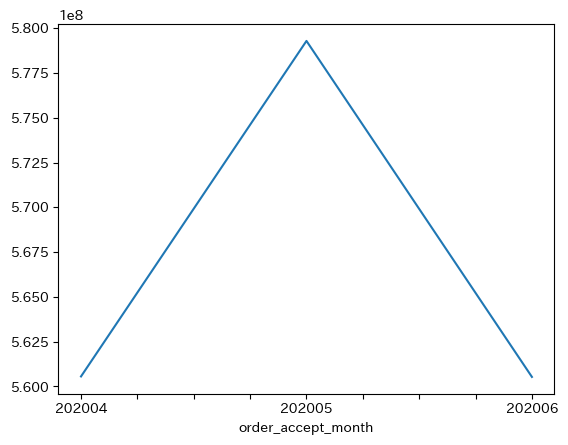

In [15]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# 月別の売上合計推移を表示
month_data["total_amount"].sum().plot()

<Axes: xlabel='order_accept_month'>

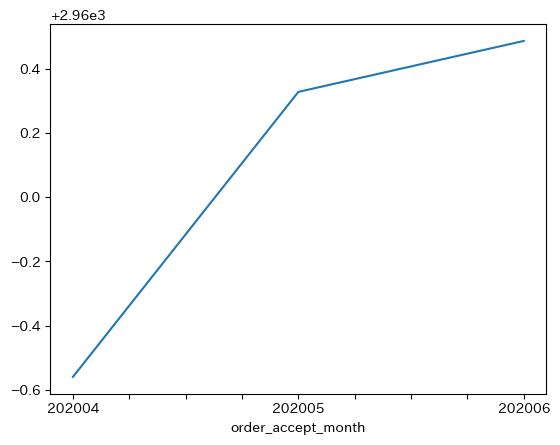

In [16]:
# 月別の平均額推移を表示
month_data["total_amount"].mean().plot()

## ノック15: 売上からヒストグラムを作成

(array([ 21524.,      0.,  48969., 135664., 111217.,  77622.,  54146.,
         59814.,  34394.,  31086.]),
 array([ 698. , 1138.2, 1578.4, 2018.6, 2458.8, 2899. , 3339.2, 3779.4,
        4219.6, 4659.8, 5100. ]),
 <BarContainer object of 10 artists>)

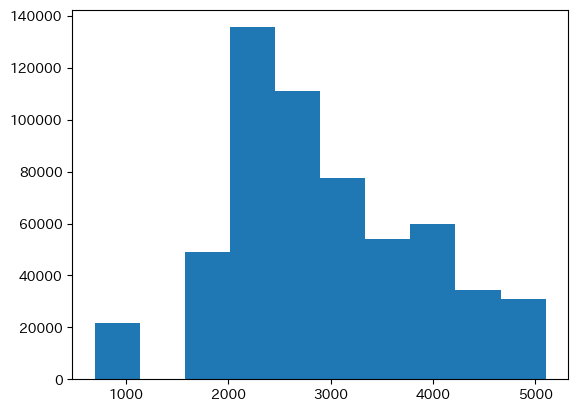

In [17]:
# 売上の分布をヒストグラムで表示
plt.hist(analyze_data['total_amount'])

(array([10728., 10796.,     0.,     0.,     0., 48969., 45777., 78334.,
        23175., 66451., 44368., 38745., 27653., 42503., 12508., 35285.,
        23739., 11151., 23168., 22649.,  8437.]),
 array([ 698.        ,  907.61904762, 1117.23809524, 1326.85714286,
        1536.47619048, 1746.0952381 , 1955.71428571, 2165.33333333,
        2374.95238095, 2584.57142857, 2794.19047619, 3003.80952381,
        3213.42857143, 3423.04761905, 3632.66666667, 3842.28571429,
        4051.9047619 , 4261.52380952, 4471.14285714, 4680.76190476,
        4890.38095238, 5100.        ]),
 <BarContainer object of 21 artists>)

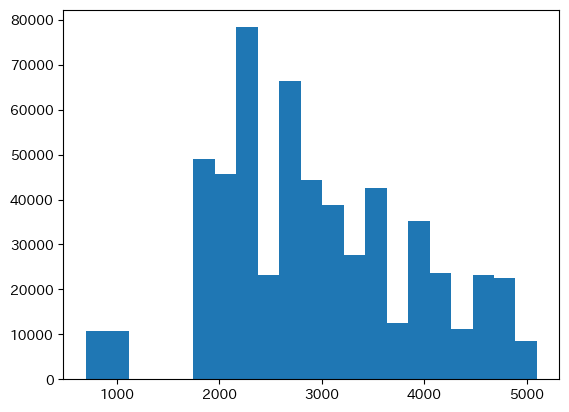

In [18]:
# ヒストグラムの階級をより細かくなるように指定
plt.hist(analyze_data['total_amount'], bins=21)

## ノック16: 都道府県別の売上を集計して可視化

In [19]:
# 都道府県別の売上をピボットテーブルを用いたクロス集計して表示
pre_data = pd.pivot_table(analyze_data, index='order_accept_month',
                          columns='narrow_area', values='total_amount',
                          aggfunc='mean')
pre_data

narrow_area,千葉,埼玉,東京,栃木,神奈川,群馬,茨城
order_accept_month,,,,,,,
202004,2959.062000,2976.519634,2960.592173,2992.173548,2948.001171,2942.046543,2947.479814
202005,2953.545504,2977.290771,2962.603059,2998.165682,2949.597054,2948.269611,2941.796835
202006,2955.761885,2976.988380,2962.949987,2991.542844,2950.520464,2945.504744,2935.951783


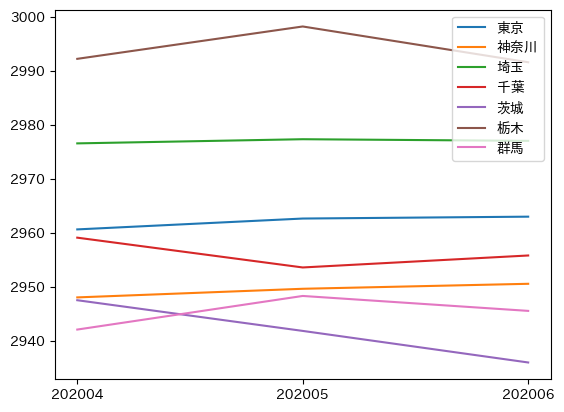

In [20]:
# 都道府県別の売上のグラフ
plt.plot(list(pre_data.index), pre_data['東京'], label='東京')  # 左から、行のリスト、利用する列、凡例に表示する内容を示す
plt.plot(list(pre_data.index), pre_data['神奈川'], label='神奈川')
plt.plot(list(pre_data.index), pre_data['埼玉'], label='埼玉')
plt.plot(list(pre_data.index), pre_data['千葉'], label='千葉')
plt.plot(list(pre_data.index), pre_data['茨城'], label='茨城')
plt.plot(list(pre_data.index), pre_data['栃木'], label='栃木')
plt.plot(list(pre_data.index), pre_data['群馬'], label='群馬')
plt.legend()

## ノック17: クラスタリング用にデータ加工

In [21]:
# 注文データを店舗毎に集計し、クラスタリングの準備をする
store_clustering = analyze_data.groupby('store_id')['total_amount'].agg(['size', 'mean', 'median', 'max', 'min'])  # total_amountに関して、異なる統計量をaggで一気に算出。sizeはデータ数
store_clustering.reset_index(inplace=True, drop=True)
print(len(store_clustering))
store_clustering.head()

196


,size,mean,median,max,min
0,2877,3129.834897,3050.0,5100,1857
1,2294,2989.003923,2677.0,5100,698
2,3776,2947.170286,2808.0,5100,698
3,1740,3074.770115,2877.0,4744,1899
4,2760,2845.661594,2791.0,4744,698


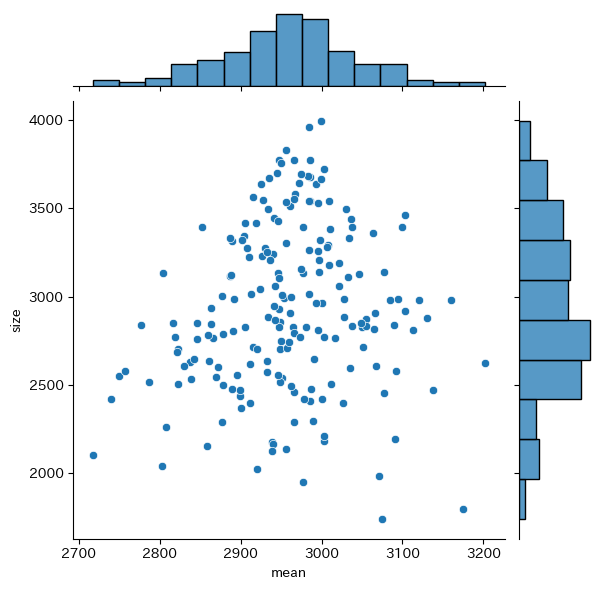

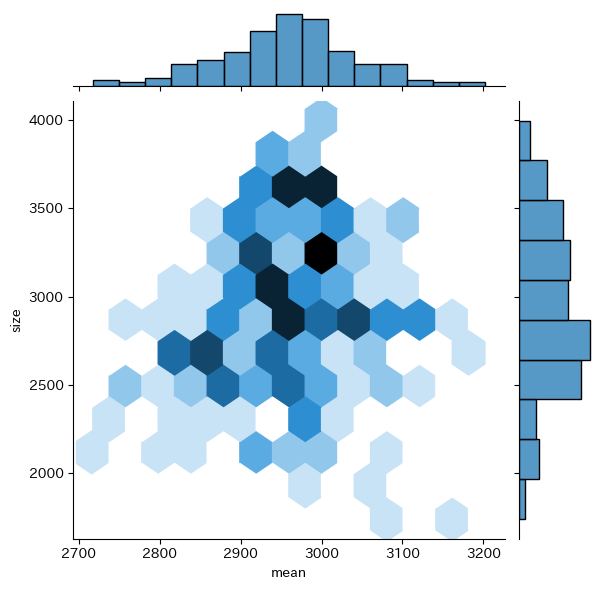

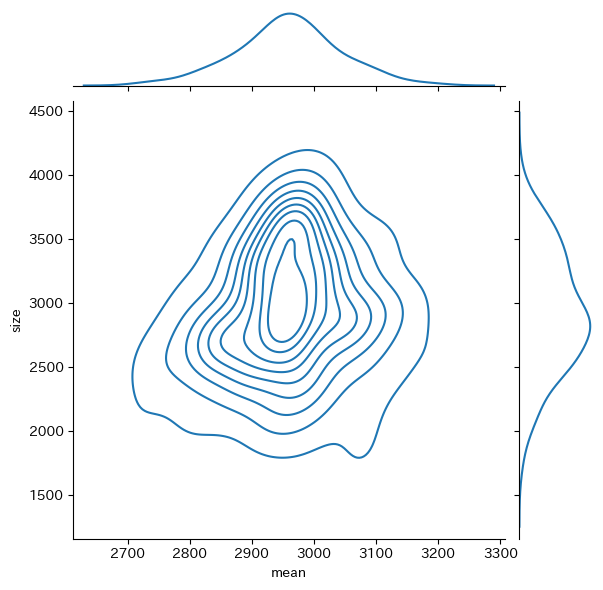

In [22]:
# 各店舗の状況を可視化
import seaborn as sns
hexbin = sns.jointplot(x='mean', y='size', data=store_clustering)  # 普通の散布図
hexbin = sns.jointplot(x='mean', y='size', data=store_clustering, kind='hex')  # hex を指定する事で、散布図を六角形に区切って濃度を表す図にする
hexbin = sns.jointplot(x='mean', y='size', data=store_clustering, kind='kde')  # kde を指定する事で、散布図を密度の等高線で表す図にする

## ノック18: クラスタリングで店舗をグループ化

In [23]:
# K-means法(教師なし学習)でクラスタリング
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# データの標準化
sc = StandardScaler()
store_clustering_sc = sc.fit_transform(store_clustering)

# クラスタ数とランダムシードを指定（ランダムシードを固定するのは、結果が毎回変わるのを防ぐため）
kmeans = KMeans(n_clusters=4, random_state=0)

# モデルの構築およびクラスタリング結果をstore_clustering['cluster']に格納
clusters = kmeans.fit(store_clustering_sc)
store_clustering['cluster'] = clusters.labels_

print(store_clustering['cluster'].unique())
store_clustering.head()

[2 1 0 3]


  File "c:\Users\nao23\Documents\Python_Projects\02_MLSys_100Knocks\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


,size,mean,median,max,min,cluster
0,2877,3129.834897,3050.0,5100,1857,2
1,2294,2989.003923,2677.0,5100,698,1
2,3776,2947.170286,2808.0,5100,698,0
3,1740,3074.770115,2877.0,4744,1899,2
4,2760,2845.661594,2791.0,4744,698,1


## ノック19: グループの傾向を分析

In [24]:
# グループ毎の件数の確認
store_clustering.columns = ['月内件数', '月内平均値', '月内中央値', '月内最大値', '月内最小値', 'cluster']
store_clustering.groupby('cluster').count()

,月内件数,月内平均値,月内中央値,月内最大値,月内最小値
cluster,,,,,
0,89,89,89,89,89
1,69,69,69,69,69
2,14,14,14,14,14
3,24,24,24,24,24


In [25]:
# グループ毎の金額の内訳の確認
store_clustering.groupby('cluster').mean()

,月内件数,月内平均値,月内中央値,月内最大値,月内最小値
cluster,,,,,
0,3280.640449,2967.718081,2799.393258,5076.000000,741.325843
1,2608.927536,2887.074854,2724.884058,4761.463768,743.405797
2,2514.642857,3071.595911,2880.428571,4896.571429,1882.071429
3,2801.583333,3063.532847,3009.375000,5023.666667,758.250000


## ノック20: クラスタリングの結果をt-SNEで可視化

In [26]:
# 高次元データの次元数を減らして可視化するため、t-SNE法を用いる
from sklearn.manifold import TSNE

# 2次元までの削減とランダムシード固定を指定
tsne = TSNE(n_components=2, random_state=0)
x = tsne.fit_transform(store_clustering_sc)

tsne_df = pd.DataFrame(x)
tsne_df['cluster'] = store_clustering['cluster']

# 次元削減結果の2次元データを axis_0, axis_1 と命名
tsne_df.columns = ['axis_0', 'axis_1', 'cluster']
tsne_df.head()

,axis_0,axis_1,cluster
0,2.582927,5.524418,2
1,-9.876147,7.789062,1
2,-14.527178,-2.915499,0
3,5.210505,6.990646,2
4,17.024614,0.408800,1


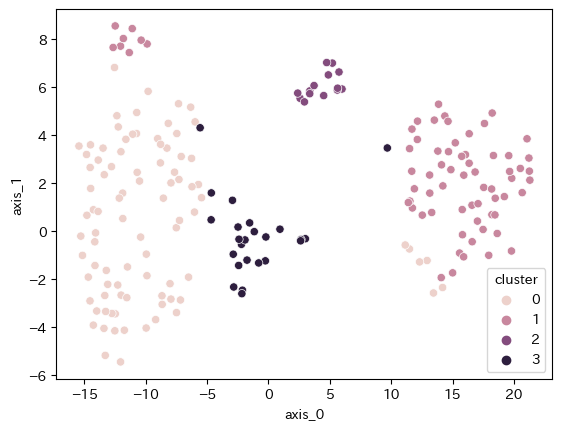

In [27]:
# 結果を表示
# axis_0 と axis_1 が何を意味しているのかは要考慮
tsne_graph = sns.scatterplot(x='axis_0', y='axis_1', hue='cluster', data=tsne_df)